In [4]:
import pandas as pd

In [50]:
df = pd.read_csv('WorldCupMatches.csv')
cp = pd.read_csv('WorldCups.csv')
pl = pd.read_csv('WorldCupPlayers.csv')
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


# Teams that have scored the most goals

In [8]:
home_goals = df.groupby("Home Team Name")["Home Team Goals"].sum()
away_goals = df.groupby("Away Team Name")["Away Team Goals"].sum()
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)
total_goals.head(10)

Brazil         225.0
Argentina      133.0
Germany FR     131.0
Italy          128.0
France         108.0
Germany        104.0
Spain           92.0
Netherlands     91.0
Hungary         87.0
Uruguay         80.0
dtype: float64

# Number of World Cup matches won

In [13]:
df["Home Win"] = df["Home Team Goals"] > df["Away Team Goals"]
df["Away Win"] = df["Away Team Goals"] > df["Home Team Goals"]
home_wins = df.groupby("Home Team Name")["Home Win"].sum()
away_wins = df.groupby("Away Team Name")["Away Win"].sum()

total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)
total_wins.head(10)

Brazil         71.0
Italy          45.0
Argentina      44.0
Germany FR     36.0
Germany        34.0
France         29.0
Netherlands    29.0
Spain          29.0
England        26.0
Uruguay        20.0
dtype: float64

In [14]:
finals_df = df[df["Stage"] == "Final"].copy()
finals_df.loc[:, "Winner"] = finals_df.apply(
    lambda row: row["Home Team Name"] if row["Home Team Goals"] > row["Away Team Goals"] else row["Away Team Name"],
    axis=1)
winners_count = finals_df["Winner"].value_counts()
winners_count

Winner
Italy         4
Brazil        4
Germany FR    3
Germany       2
Argentina     2
France        2
Uruguay       1
England       1
Spain         1
Name: count, dtype: int64

# Team with the Most World Cup Titles

In [33]:
finals_df = df[df["Stage"] == "Final"].copy()
finals_df = finals_df.drop_duplicates(
    subset=["Year", "Home Team Name", "Away Team Name", "Home Team Goals", "Away Team Goals"])


def determine_winner(row):
    if pd.notna(row["Win conditions"]) and row["Win conditions"].strip():
        return row["Win conditions"].split()[0]
    return row["Home Team Name"] if row["Home Team Goals"] > row["Away Team Goals"] else row["Away Team Name"]


finals_df.loc[:, "Winner"] = finals_df.apply(determine_winner, axis=1)
finals_df["Winner"] = finals_df["Winner"].replace({"Germany FR": "Germany"})
winners_count = finals_df["Winner"].value_counts()
finals_df[
    ["Year", "Home Team Name", "Away Team Name", "Home Team Goals", "Away Team Goals", "Win conditions", "Winner"]]
winners_count

Winner
Brazil       5
Italy        4
Germany      4
Argentina    2
Uruguay      1
England      1
France       1
Spain        1
Name: count, dtype: int64

In [18]:
finals_df[
    ["Year", "Home Team Name", "Away Team Name", "Home Team Goals", "Away Team Goals", "Win conditions", "Winner"]]

,Year,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,Win conditions,Winner
17,1930.0,Uruguay,Argentina,4.0,2.0,,Uruguay
34,1934.0,Italy,Czechoslovakia,2.0,1.0,Italy win after extra time,Italy
52,1938.0,Italy,Hungary,4.0,2.0,,Italy
100,1954.0,Germany FR,Hungary,3.0,2.0,,Germany
135,1958.0,Brazil,Sweden,5.0,2.0,,Brazil
167,1962.0,Brazil,Czechoslovakia,3.0,1.0,,Brazil
199,1966.0,England,Germany FR,4.0,2.0,England win after extra time,England
231,1970.0,Brazil,Italy,4.0,1.0,,Brazil
269,1974.0,Netherlands,Germany FR,1.0,2.0,,Germany
307,1978.0,Argentina,Netherlands,3.0,1.0,Argentina win after extra time,Argentina


In [40]:
cp["Runners-Up"] = cp["Runners-Up"].replace({"Germany FR": "Germany"})
cp["Runners-Up"].value_counts()

Runners-Up
Germany           4
Argentina         3
Netherlands       3
Czechoslovakia    2
Hungary           2
Italy             2
Brazil            2
Sweden            1
France            1
Name: count, dtype: int64

In [41]:
cp["Third"] = cp["Third"].replace({"Germany FR": "Germany"})
cp["Third"].value_counts()

Third
Germany        4
Sweden         2
Brazil         2
Poland         2
France         2
Austria        1
USA            1
Chile          1
Portugal       1
Italy          1
Croatia        1
Turkey         1
Netherlands    1
Name: count, dtype: int64

# Stadiums with most no of matches played

In [52]:

pr = pd.DataFrame(df.groupby('Stadium')['Stadium'].count()).rename(columns={'Stadium': 'no of matches'})
pr = df['Stadium'].value_counts().rename_axis('Stadium').reset_index(name='no of matches')
pr = pr.sort_values(by='no of matches', ascending=False)
pr.head(10)


,Stadium,no of matches
0,Estadio Azteca,19
1,Jalisco,14
2,Olympiastadion,14
3,Nou Camp - Estadio Le�n,11
4,Estadio Centenario,10
5,Nacional,10
6,Estadio do Maracana,10
7,Estadio Nacional,10
8,El Monumental - Estadio Monumental Antonio Ves...,9
9,Wembley Stadium,9


In [19]:
import pandas as pd
from scipy.stats import binomtest

df["Home Lead"] = df["Half-time Home Goals"] > df["Half-time Away Goals"]
df["Home Win"] = df["Home Team Goals"] > df["Away Team Goals"]
success_count = df[df["Home Lead"]]["Home Win"].sum()
total_count = df["Home Lead"].sum()
p_value = binomtest(success_count, total_count, 0.5, alternative="greater")
print(f"The probability that the leader at halftime will win the match: {success_count / total_count:.2f}")
if p_value.pvalue < 0.05:
    print("There is a statistically significant relationship between leading at halftime and winning the match.")
else:
    print("There is no statistically significant relationship.")

The probability that the leader at halftime will win the match: 0.90
There is a statistically significant relationship between leading at halftime and winning the match.


In [53]:
df[(df["Half-time Home Goals"] > df["Half-time Away Goals"]) & (df["Home Team Goals"] > df["Away Team Goals"])]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
831,2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL
837,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
845,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL


In [54]:
df[(df["Half-time Home Goals"] > df["Half-time Away Goals"]) & (df["Home Team Goals"] < df["Away Team Goals"])]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
443,1990.0,20 Jun 1990 - 21:00,Group C,Luigi Ferraris,Genoa,Sweden,1.0,2.0,Costa Rica,,30223.0,1.0,0.0,PETROVIC Zoran (SRB),SNODDY Alan (NIR),COURTNEY George (ENG),322.0,128.0,SWE,CRC
524,1998.0,13 Jun 1998 - 17:30,Group E,Stade de Gerland,Lyon,Korea Republic,1.0,3.0,Mexico,,39100.0,1.0,0.0,BENKO Gunter (AUT),FRED Lencie (VAN),SCHNEIDER Erich (GER),1014.0,8732.0,KOR,MEX
618,2002.0,12 Jun 2002 - 20:30,Group B,Jeju World Cup Stadium,Jeju,Slovenia,1.0,3.0,Paraguay,,30176.0,1.0,0.0,RAMOS RIZO Felipe (MEX),LINDBERG Leif (SWE),KRISHNAN Visva (SIN),43950100.0,43950040.0,SVN,PAR
777,2014.0,14 Jun 2014 - 16:00,Group D,Estadio Castelao,Fortaleza,Uruguay,1.0,3.0,Costa Rica,,58679.0,1.0,0.0,BRYCH Felix (GER),BORSCH Mark (GER),LUPP Stefan (GER),255931.0,300186489.0,URU,CRC


In [55]:
df[(df["Half-time Home Goals"] < df["Half-time Away Goals"]) & (df["Home Team Goals"] > df["Away Team Goals"])]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
17,1930.0,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4.0,2.0,Argentina,,68346.0,1.0,2.0,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405.0,1087.0,URU,ARG
22,1934.0,27 May 1934 - 16:30,Preliminary round,Giovanni Berta,Florence,Germany,5.0,2.0,Belgium,,8000.0,1.0,2.0,MATTEA Francesco (ITA),MELANDRI Ermenegildo (ITA),BAERT Jacques (FRA),204.0,1108.0,GER,BEL
25,1934.0,27 May 1934 - 16:30,Preliminary round,Littorio,Trieste,Czechoslovakia,2.0,1.0,Romania,,9000.0,0.0,1.0,LANGENUS Jean (BEL),SCARPI Giuseppe (ITA),SCORZONI Raffaele (ITA),204.0,1141.0,TCH,ROU
42,1938.0,09 Jun 1938 - 18:00,First round,Stade Municipal,Toulouse,Cuba,2.0,1.0,Romania,,8000.0,0.0,1.0,BIRLEM Alfred (GER),CAPDEVILLE Pierre (FRA),MARENCO Paul (FRA),206.0,1157.0,CUB,ROU
43,1938.0,09 Jun 1938 - 18:00,First round,Parc des Princes,Paris,Switzerland,4.0,2.0,Germany,,20025.0,1.0,2.0,EKLIND Ivan (SWE),BAERT Louis (BEL),VAN MOORSEL Johannes (NED),206.0,1166.0,SUI,GER
48,1938.0,14 Jun 1938 - 18:00,Quarter-finals,Stade du Parc Lescure,Bordeaux,Brazil,2.0,1.0,Czechoslovakia,,18141.0,0.0,1.0,CAPDEVILLE Georges (FRA),MARENCO Paul (FRA),KISSENBERGER Ernest (FRA),429.0,1153.0,BRA,TCH
51,1938.0,19 Jun 1938 - 17:00,Match for third place,Stade du Parc Lescure,Bordeaux,Brazil,4.0,2.0,Sweden,,12000.0,1.0,2.0,LANGENUS Jean (BEL),OLIVE D. (FRA),VALPREDE Ferdinand (FRA),3488.0,1151.0,BRA,SWE
55,1950.0,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3.0,1.0,USA,,9511.0,0.0,1.0,VIANA Mario (BRA),DA COSTA VIEIRA Jose (POR),DE LA SALLE Charles (FRA),208.0,1208.0,ESP,USA
72,1950.0,13 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Uruguay,3.0,2.0,Sweden,,7987.0,1.0,2.0,GALEATI Giovanni (ITA),BERANEK Alois (AUT),DE NICOLA Cayetano (PAR),209.0,1231.0,URU,SWE
127,1958.0,17 Jun 1958 - 19:00,Group 3,Rasunda Stadium,Solna,Wales,2.0,1.0,Hungary,,2823.0,0.0,1.0,LATYCHEV Nikolaj (URS),CODESAL Jose Maria (URU),ERIKSSON Arne (FIN),220.0,1408.0,WAL,HUN


In [56]:
df[(df["Half-time Home Goals"] < df["Half-time Away Goals"]) & (df["Home Team Goals"] < df["Away Team Goals"])]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
103,1958.0,08 Jun 1958 - 19:00,Group 1,Malmo Stadion,Malm�,Argentina,1.0,3.0,Germany FR,,31156.0,1.0,2.0,LEAFE Reginald (ENG),HELGE Leo (DEN),AHLNER Sten (SWE),220.0,1323.0,ARG,FRG
235,1974.0,14 Jun 1974 - 19:30,Group 2,Westfalenstadion,Dortmund,Zaire,0.0,2.0,Scotland,,27000.0,0.0,2.0,SCHULENBURG Gerhard (GER),BOSKOVIC Tony (AUS),WEYLAND Hans Joachim (FRG),262.0,2176.0,ZAI,SCO
236,1974.0,15 Jun 1974 - 16:00,Group 3,Niedersachsenstadion,Hanover,Uruguay,0.0,2.0,Netherlands,,55100.0,0.0,1.0,PALOTAI Karoly (HUN),KAZAKOV Pavel (URS),RAINEA Nicolae (ROU),262.0,2098.0,URU,NED
240,1974.0,18 Jun 1974 - 16:00,Group 1,Volksparkstadion,Hamburg,Australia,0.0,3.0,Germany FR,,53300.0,0.0,2.0,KAMEL Mahmoud (EGY),GONZALEZ ARCHUNDIA Alfonso (MEX),PEREZ NUNEZ Edison A. (PER),262.0,1954.0,AUS,FRG
246,1974.0,19 Jun 1974 - 19:30,Group 4,Olympiastadion,Munich,Haiti,0.0,7.0,Poland,,25300.0,0.0,5.0,SUPPIAH George (SIN),BIWERSI Ferdinand (GER),ESCHWEILER Walter (GER),262.0,2085.0,HAI,POL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
827,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
844,2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER


In [58]:
df["Lead HT"] = df["Half-time Home Goals"] > df["Half-time Away Goals"]
df["Win Final"] = df["Home Team Goals"] > df["Away Team Goals"]
grouped_results = df.groupby(["Lead HT", "Win Final"]).size()
grouped_results


Lead HT  Win Final
False    False        4055
         True          216
True     False          29
         True          272
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [60]:
df.shape

(4572, 22)

In [64]:
df["Lead HT"] = df["Half-time Home Goals"] > df["Half-time Away Goals"]
df["Win Final"] = df["Home Team Goals"] > df["Away Team Goals"]
grouped_df = df.groupby(["Lead HT", "Win Final"]).size().reset_index(name="Count")

success_count = grouped_df[(grouped_df["Lead HT"] == True) & (grouped_df["Win Final"] == True)]["Count"].sum()
total_count = grouped_df[grouped_df["Lead HT"] == True]["Count"].sum()

print(f"The number of matches where the team led at halftime and won in the end: {success_count}")
print(f"The total number of matches where the team was leading at halftime.: {total_count}")


The number of matches where the team led at halftime and won in the end: 272
The total number of matches where the team was leading at halftime.: 301


In [63]:
binomtest(272, 301, 0.5)

BinomTestResult(k=272, n=301, alternative='two-sided', statistic=0.9036544850498339, pvalue=1.1647265686034447e-50)

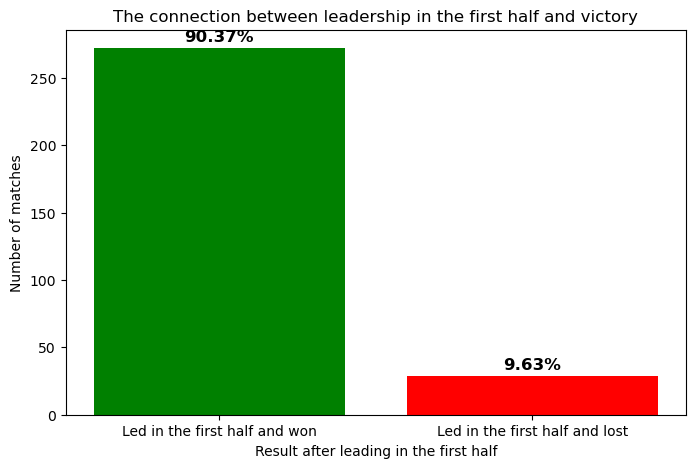

In [65]:
import matplotlib.pyplot as plt

categories = ["Led in the first half and won", "Led in the first half and lost"]
values = [success_count, total_count - success_count]
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=["green", "red"])
plt.title("The connection between leadership in the first half and victory")
plt.ylabel("Number of matches")
plt.xlabel("Result after leading in the first half")
plt.text(0, values[0] + 5, f"{success_count / total_count:.2%}", ha="center", fontsize=12, fontweight="bold")
plt.text(1, values[1] + 5, f"{(total_count - success_count) / total_count:.2%}", ha="center", fontsize=12,
         fontweight="bold")
plt.show()